### HPDI function

In [3]:
HPDI = function(fun, credible=.95, delta=.1, epsilon=1e-3, lb=0, ub=20)
{
  
  ## partitioning
  partition = seq(lb,ub, by=epsilon)
  xstar     = head(partition, -1) + epsilon/2
  
  
  ## realms
  sortcum   = cumsum(sort(fun(xstar) * epsilon, decreasing=T))
  realm_TF  = sortcum < sortcum[length(sortcum)] * credible
  realm_idx = order(fun(xstar) * epsilon, decreasing=T)[realm_TF]
  realm     = sort(xstar[realm_idx])
  
  
  ## finding the intervals
  intervals_finder = function(realm_)
  {
    size  = length(realm_)
    
    main  = realm_[-size]
    sub   = realm_[-1]
    
    criticals = (1:size)[abs(main-sub) >= delta]
    breaks    = realm_[sort(c(1, criticals, criticals+1, size))]
    
    for(i in 1:(length(breaks)/2))
    {
      cat("Interval : [", breaks[2*i - 1], breaks[2*i], "]\n")
    }
  }
  
  return(intervals_finder(realm))
}

#### Case1 : Gamma Distribution

#### 1. Define

In [4]:
# Define PDFs

PDF_gamma = function(x)
{
  return(dgamma(x, shape = 5, scale = 1))
}

#### 2. Get Interval

In [28]:
HPDI(PDF_gamma)

Interval : [ 1.2075 9.4285 ]


In [29]:
integrate(PDF_gamma, 1.2075, 9.4285)

0.9499403 with absolute error < 2.3e-12

#### 3. Plot

In [16]:
library(ggplot2)

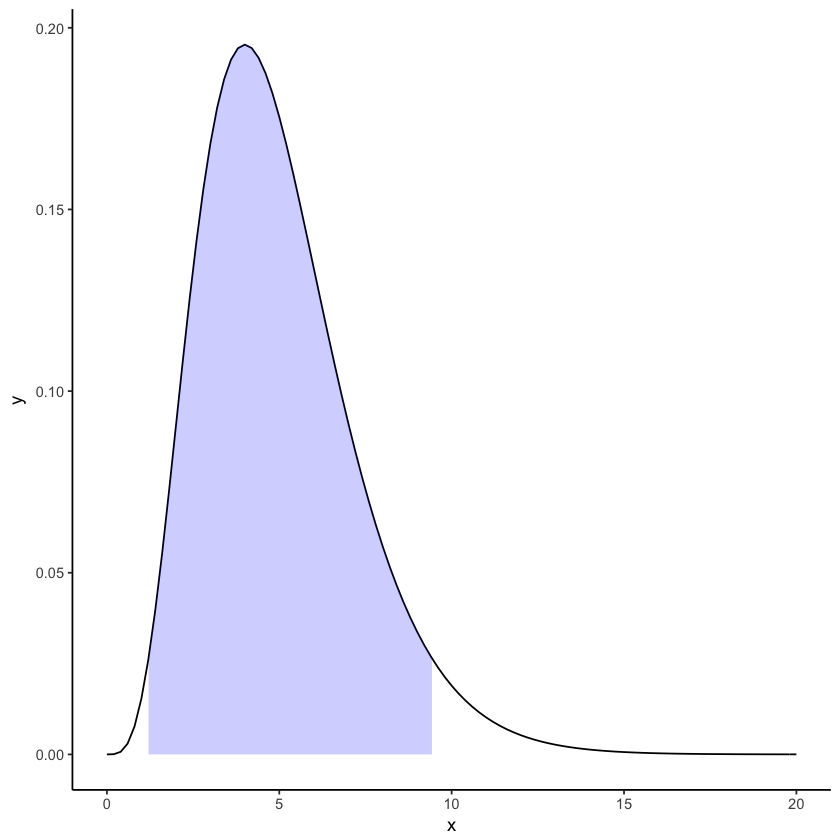

In [36]:
ggplot(data.frame(x = c(0, 20)), aes(x)) +
  stat_function(fun = PDF_gamma) + 
  stat_function(fun = PDF_gamma, 
                xlim = c(1.2075,9.4285),
                geom = "area", fill="blue", alpha=.2)  +
  theme_classic()

#### Case2 : Sine - formed distribution (Bimodal)

#### 1. Define

In [27]:
PDF_sin = function(x)
{
  ## support : [-2 * pi , pi]
  norm.const = 11.42478
  return((sin(x) + 1)/norm.const)
}

#### 2. Get Interval

In [31]:
HPDI(PDF_sin, lb=-2*pi, ub=pi) ## Support

Interval : [ -6.282685 -2.798685 ]
Interval : [ -0.3426853 3.140315 ]


In [33]:
integrate(PDF_sin,  -6.282685, -2.798685)$value +
integrate(PDF_sin,  -0.3426853, 3.140315)$value

[1] 0.9497457

#### 3. Plot

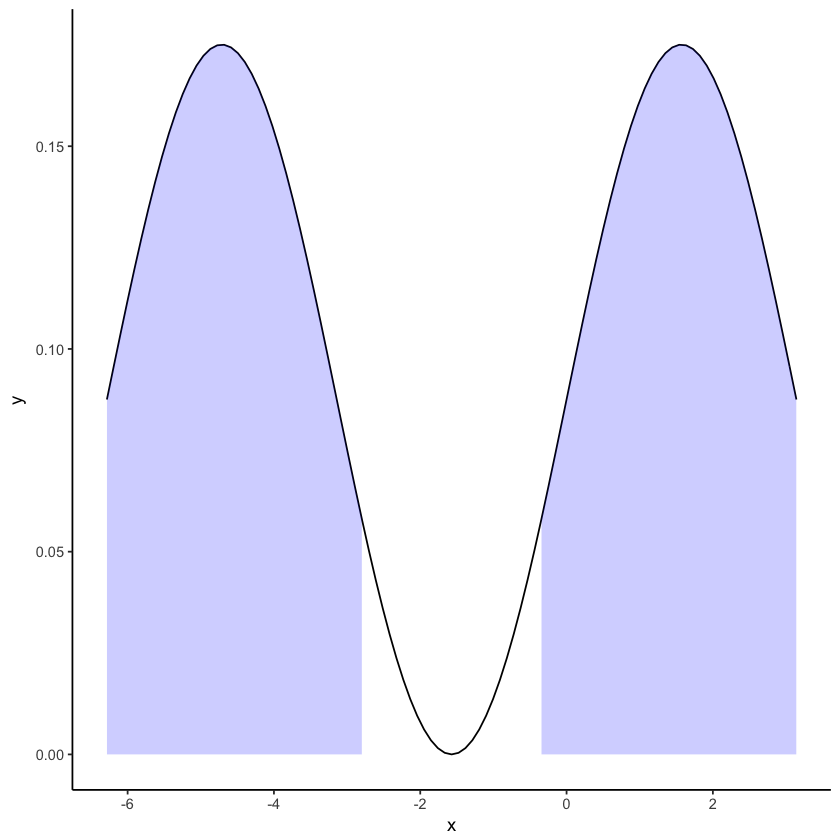

In [35]:
ggplot(data.frame(x = c(-2*pi, pi)), aes(x)) +
  stat_function(fun = PDF_sin) + 
  stat_function(fun = PDF_sin, 
                xlim = c(-6.282685,-2.798685),
                geom = "area", fill="blue", alpha=.2)  +
  stat_function(fun = PDF_sin, 
                xlim = c(-0.3426853,3.140315),
                geom = "area", fill="blue", alpha=.2)  +
  theme_classic()